# Tutorial 8: Decision Trees
### Dr. Daugherity, PHYS 453 - Spring 2020

Decision trees are efficient, effective, "white box" classifier that are prone to overfitting.  Its time to grow some trees!

**REFERENCES**
* https://scikit-learn.org/stable/modules/tree.html#tree
* https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap # for making palettes
from sklearn import tree
from sklearn import datasets  # for generating toy data

# Dr D's Golden Rule:
**ALWAYS TEST YOUR CODE IN CASES WHERE YOU KNOW THE RIGHT ANSWER!**

In [2]:
# The default colors in plot_tree are orange and blue, so I'll make some palettes to match
cmap_bold = ListedColormap(['tab:orange','tab:blue'])
cmap_light = ListedColormap(['bisque','lightsteelblue'])

Use the make_blobs function to quickly produce some blobs of 2 feature, 2 class data:  
https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html

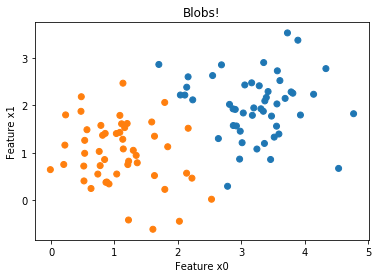

In [3]:
X_blob, y_blob = datasets.make_blobs(n_samples=100, centers=[[1,1],[3,2]], cluster_std=0.7, n_features=2, random_state=1)
                                     
plt.figure()
plt.scatter(X_blob[:,0], X_blob[:,1], c=y_blob, cmap=cmap_bold)
plt.xlabel("Feature x0")
plt.ylabel("Feature x1")
plt.title("Blobs!")
plt.show()

# First Example: Train and Predict
As with all sklearn classifiers:
* declare a new classifier and set your parameters
* `fit` to the training data
* `predict` new samples to classify

As we discussed in class the decisison trees will **over-train by default**, so we'll look at how to fix that later.

In [4]:
clf = tree.DecisionTreeClassifier()
clf.fit(X_blob, y_blob)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

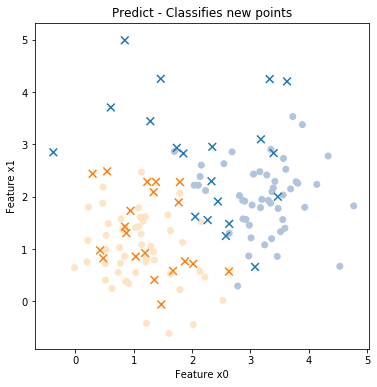

In [5]:
# Make some new points to predict: 20 rows, 2 columns, gaussian with mean=2 and stdev=1
X_pred = np.random.normal(loc=2, scale = 1, size=(40,2))
y_pred = clf.predict(X_pred)

# plot the new predictions
plt.figure(figsize=(6,6))
plt.scatter(X_blob[:,0], X_blob[:,1], c=y_blob, marker='o', cmap=cmap_light )
plt.scatter(X_pred[:,0], X_pred[:,1], c=y_pred, marker='x',cmap=cmap_bold, s=60)

plt.xlabel("Feature x0")
plt.ylabel("Feature x1")
plt.title("Predict - Classifies new points")
plt.show()

# Decision Boundary

The predictions (bold x's) seem reasonable compared to our training data (light circles).  But there are a few odd choices.  We need a way to see the **DECISION BOUNDARY**, the dividing line between orange and blue.  One direct way to get this is to predict an entire grid of points.  We'll be doing this a _lot_, so begin by making a function that defines a complete grid of points, calls predict on each point, and plots the result to give us a nice decision boundary.  You will see this code in many sklearn examples.

In [6]:
def plot_decision(clf, X, cmap='image.cmap', h=0.2, margin=0.2):
    """Plots decision boundary of clf.  X is only used to find min/max range; h = grid size; margin = extra border padding"""
    x_min, x_max = X[:, 0].min()-margin, X[:, 0].max()+margin
    y_min, y_max = X[:, 1].min()-margin, X[:, 1].max()+margin
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.pcolormesh(xx, yy, Z, cmap=cmap)

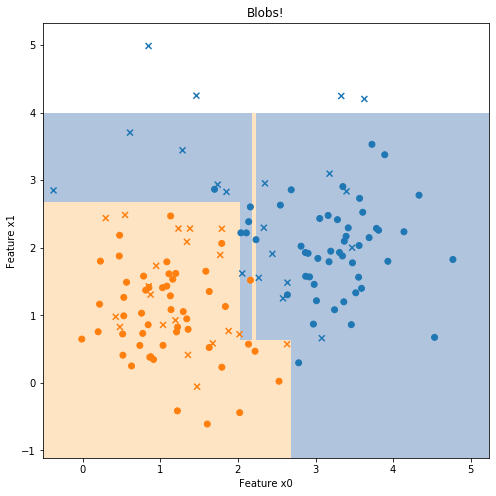

In [7]:
plt.figure(figsize=(8,8))

plot_decision(clf,X_blob, cmap_light, h=0.05, margin=0.5)
plt.scatter(X_blob[:,0], X_blob[:,1], c=y_blob, marker='o', cmap=cmap_bold )
plt.scatter(X_pred[:,0], X_pred[:,1], c=y_pred, marker='x',cmap=cmap_bold)


plt.xlabel("Feature x0")
plt.ylabel("Feature x1")
plt.title("Blobs!")
plt.show()

Now we have one simple line of code to show us the classification regions!

# Depth Examples
One common way to avoid overfitting is to restrict the size of the tree.  Limiting the tree size also makes it easier to dig into the tree's structure and understand it.  

The next examples do two things:
1.  Use the `plot_tree` function to visualize the tree
2.  Limit the `max_depth` to go from simple to more complex trees.

I'll define a new function to make these plots to avoid having to copy-and-paste the same code four times

In [8]:
def make_tree_plots(depth):
    """Makes a new tree of a fixed depth, then plots the tree structure and decision boundary"""
    plt.figure(figsize=(14,6))

    plt.subplot(1,2,1)
    clf = tree.DecisionTreeClassifier(max_depth=depth)
    clf.fit(X_blob, y_blob)
    tree.plot_tree(clf, filled=True, class_names=['orange','blue'])

    plt.subplot(1,2,2)
    plot_decision(clf,X_blob, cmap=cmap_light, h=0.02, margin=0.5)
    plt.scatter(X_blob[:,0], X_blob[:,1], c=y_blob, cmap=cmap_bold)
    plt.xlabel("Feature x0")
    plt.ylabel("Feature x1")
    plt.title("Decision Boundary")

    plt.show()   

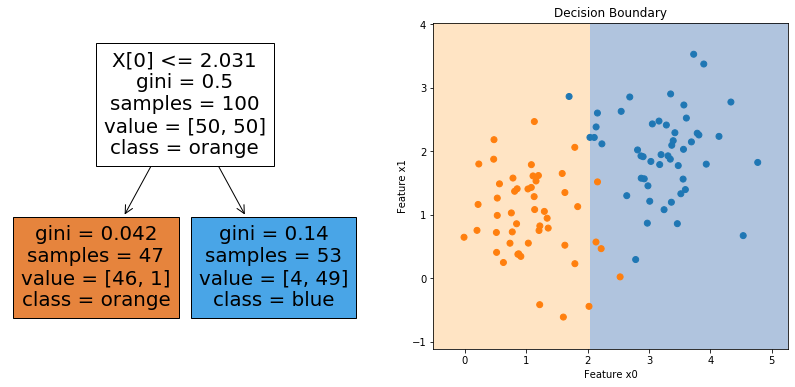

In [9]:
make_tree_plots(depth=1)

In [10]:
clf = tree.DecisionTreeClassifier(max_depth=1)
clf.fit(X_blob, y_blob)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=1, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [11]:
clf.score(X_blob,y_blob)

0.95

In [12]:
clf.predict([[1,1],[3,3]])

array([0, 1])

In [13]:
y_blob

array([0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0])

Take a moment and make sure you understand every detail of this diagram.  **The left branch is always yes!**

Check the missed points and make sure they match the tree.  Let's improve this by adding more layers

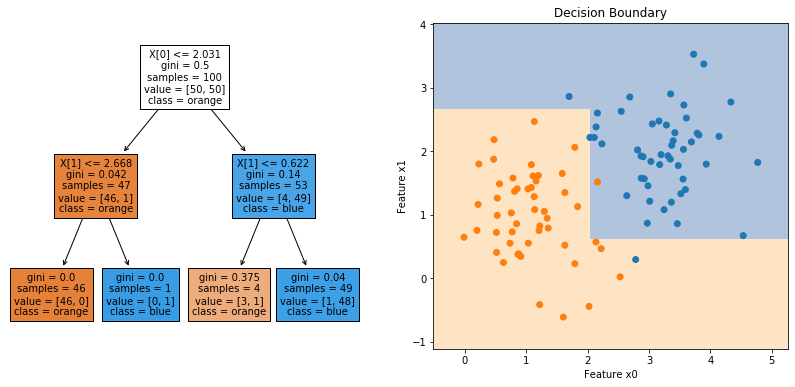

In [14]:
make_tree_plots(depth=2)

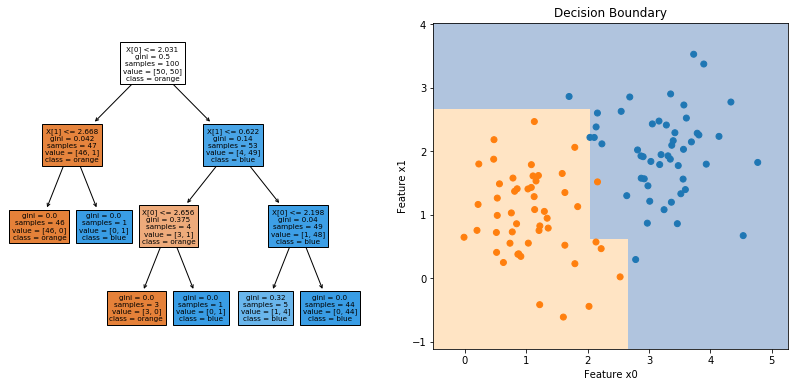

In [15]:
make_tree_plots(depth=3)

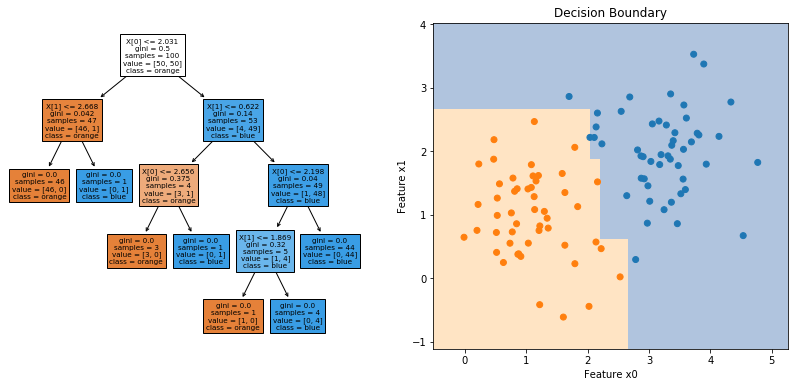

In [16]:
make_tree_plots(depth=4)